# Import des Librairies

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interactive, VBox, Button
from IPython.display import display

# Modèle de Branchement (Branching Process)
Le modèle de branchement (branching process) est un modèle stochastique qui permet de modéliser l'évolution d'une population au fil des générations.
## Description du modèle de branchement
1. **Taille de la population** : Soit $N_n$ la taille de la population à la génération $n$. Le modèle prévoit que la taille de la population à la génération $n+1$, notée $N_{n+1}$, dépend de $N_n$ et du taux de reproduction par individu.
   
2. **Taux de reproduction** : Chaque individu se reproduit de manière indépendante avec un taux de reproduction $R$. Ce taux est en général aléatoire et peut suivre une distribution donnée (par exemple, une loi de Poisson, géométrique ou binomiale).

3. **Espérance de la taille de la population** : L'espérance de la taille de la population après $n+1$ générations peut être exprimée comme :

   $$\mathbb{E}[N_{n+1}] = \mathbb{E}[N_n] \times R $$

4. **Évolution stochastique** : Le modèle est probabiliste, ce qui signifie que la taille exacte de la population varie d'une simulation à l'autre. Chaque individu de la génération $n$ peut donner naissance à un nombre aléatoire de descendants.

5. **Probabilité d'extinction** : L'une des principales questions que l'on cherche à étudier avec ce modèle est la probabilité que la population s'éteigne après un certain nombre de générations. Cette probabilité dépend de la distribution du taux de reproduction $R$. Si $\mathbb{E}[R] \leq 1$, la probabilité d'extinction est généralement élevée. En revanche, si $\mathbb{E}[R] > 1$, il y a une probabilité plus élevée que la population survienne.

## Modélisation 
Nous allons modéliser ce système de 2 façons différentes:
- On prend en compte, pour chaque génération, un taux de reproduction unique pour la totalité de la population. Ce taux de reproduction changera à chaque génération suivant une loi de probabilité donnée.
- $R$ représente le vecteur des taux de reproduction individuels de la population. La taille initiale de la population est fixée à $N_0$. À chaque génération, le taux de reproduction de chaque individu varie selon une loi de probabilité définie, ce qui permet de modéliser l'évolution stochastique de la population.

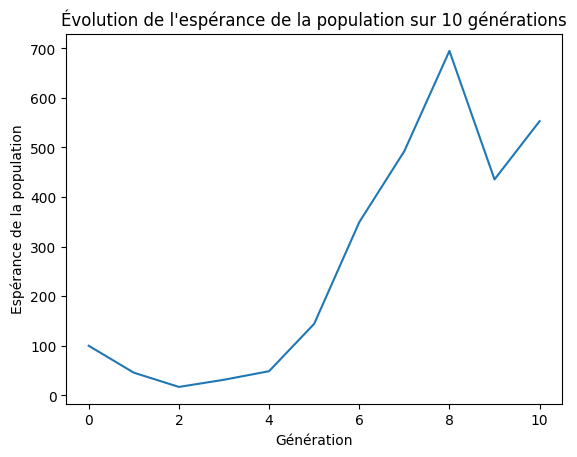

In [18]:
# Première hypothèse
## Paramètres initiaux
N0 = 100  # Population initiale
generations = 10  # Nombre de générations

# Espérance initiale de la population
esp_pop = [N0]

# Modélisation du taux de reproduction avec une loi gamma
shape_param = 2.0  # Paramètre de forme (contrôle la moyenne)
scale_param = 1.0  # Paramètre d'échelle (contrôle la dispersion)
R = np.random.gamma(shape_param, scale_param, size=generations)

# Calcul récurrent de l'espérance de la population pour chaque génération
for n in range(generations):
    esp_pop.append(esp_pop[n] * R[n])  # Ajouter la nouvelle population dans la liste

# Afficher la courbe de l'évolution de l'espérance
plt.plot(range(generations + 1), esp_pop)
plt.xlabel('Génération')
plt.ylabel('Espérance de la population')
plt.title('Évolution de l\'espérance de la population sur 10 générations')
plt.show()

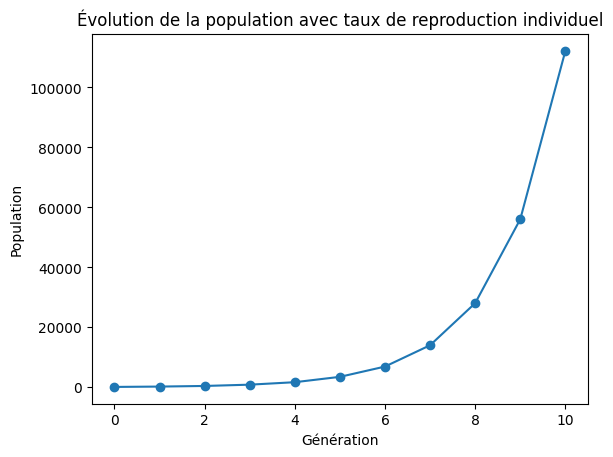

In [21]:
# Seconde hypothèse
## Paramètres initiaux
N0 = 100  # Population initiale
generations = 10  # Nombre de générations

## Espérance initiale de la population
esp_pop = [N0]

## Boucle pour chaque génération
for gen in range(generations):
    # Générer un vecteur de taux de reproduction pour chaque individu (loi gamma par exemple)
    shape_param = 2.0
    scale_param = 1.0
    R = np.random.gamma(shape_param, scale_param, size=esp_pop[gen])  # Taille égale à la population actuelle
    
    # Calcul de l'espérance à la génération suivante
    avg_reproduction_rate = np.sum(R) / len(R)
    esp_pop_next = esp_pop[gen] * avg_reproduction_rate
    
    # Arrondir pour obtenir la nouvelle population (N1, N2, ...)
    esp_pop.append(int(np.round(esp_pop_next)))

## Afficher la courbe de l'évolution de la population
plt.plot(range(generations + 1), esp_pop, marker='o')
plt.xlabel('Génération')
plt.ylabel('Population')
plt.title('Évolution de la population avec taux de reproduction individuel')
plt.show()

## Le Mouvement Brownien : Définition et Propriétés}

Le **mouvement brownien**, ou processus de Wiener, est une description mathématique d’un mouvement aléatoire, initialement utilisé pour décrire le comportement d'une « grosse » particule immergée dans un fluide. Cette particule, soumise à des collisions incessantes avec les petites molécules environnantes, suit une trajectoire irrégulière et imprévisible. Ce phénomène a été observé pour la première fois par le botaniste Robert Brown en 1827 en étudiant les mouvements chaotiques des grains de pollen. 

Dans un contexte physique, le mouvement brownien peut être modélisé de manière intuitive par les points suivants :

- Entre deux chocs, la particule se déplace en ligne droite à vitesse constante.
- La particule est accélérée lorsqu'elle entre en collision avec une molécule du fluide environnant.


Cette modélisation est utilisée dans des domaines aussi divers que la thermodynamique (comme dans la théorie cinétique des gaz), la diffusion des particules, ainsi que la finance mathématique.

### Définition mathématique

Le mouvement brownien est un processus stochastique continu dans le temps, souvent noté $B_t$, avec les propriétés suivantes :
- Les accroissements $B_t - B_s$ pour $t >$ sont indépendants et suivent une loi normale de moyenne nulle et de variance $(t - s$.
- Le processus $B_t$ est presque sûrement continu, ce qui signifie que la fonction $t \mapsto B_t(\omega)$ est continue pour presque tout $\omega$.
- Il est souvent supposé que $B_0 = 0$, autrement dit le mouvement commence à l’origine.


Le mouvement brownien est également une **martingale**, ce qui signifie que la meilleure estimation de la position future à un instant donné est la position actuelle. En d'autres termes, pour tout instant $t$, l’espérance conditionnelle $\mathbb{E}[B_{t+\tau} \mid \mathcal{F}_t] = B_t$, où $\mathcal{F}_t$ est l’information disponible jusqu’à l’instant $t$..

### Propriétés de la Moyenne et de la Diffusion

Une propriété clé du mouvement brownien est que la moyenne de ses positions à tout instant est nulle :
$$\mathbb{E}[B_t] = 0$$
Cela est dû au fait que les mouvements de la particule sont aussi susceptibles d’aller dans une direction que dans une autre, ce qui fait que, sur le long terme, les déplacements se compensent en moyenne.

Cependant, la **moyenne quadratique**, ou variance, n’est pas nulle. En fait, elle augmente de manière proportionnelle au temps $t$ :

$$ \mathbb{E}[B_t^2] = 2Dt$$

où $D$ est le **coefficient de diffusion**, un paramètre qui mesure la vitesse de dispersion de la particule dans l’espace. Ce coefficient dépend des propriétés physiques du milieu et de la particule.

### Description Dimensionnelle du Mouvement Brownien

**En une dimension**, le mouvement brownien $B_t$ est un processus gaussien qui vérifie les propriétés d’accroissement indépendant et stationnaire mentionnées plus haut. Les accroissements sont distribués selon une loi normale de moyenne nulle et de variance proportionnelle à la différence de temps $t - s$.

**En dimensions multiples**, le mouvement brownien est généralisé sous forme d’un vecteur de processus indépendants :

$$ B_t = (B_t^1, B_t^2, \dots, B_t^d)$$
où chaque composante $B_t^i$ est un mouvement brownien unidimensionnel indépendant des autres. Le mouvement brownien en $d$ dimensions est donc une trajectoire dans un espace à $d$ dimensions, où chaque composante évolue de manière indépendante.

**Autres Propriétés Importantes**

- Les trajectoires du mouvement brownien sont **nulle part dérivables**, c'est-à-dire qu’à aucun moment on ne peut leur associer une tangente définie.
- Le mouvement brownien possède la **propriété de Markov** forte, ce qui signifie que l’avenir du processus ne dépend que de son état présent, et non de sa trajectoire passée.
- Le mouvement brownien est **récurrent** en dimensions 1 et 2, ce qui signifie qu'il revisitera régulièrement les points proches de son origine. En revanche, en dimensions 3 et plus, il est **transient**, c'est-à-dire qu'il s'éloignera indéfiniment de son point de départ.

## Modèle stochastique de population 

Ce modèle est une version modifiée de l'équation logistique classique avec un terme stochastique.

$$ \frac{dN}{dt} = rN\left(1 - \frac{N}{K}\right) + \sigma N dW_t $$

- $N$ : la taille de la population à un moment donné.
- $r$ : le taux de croissance intrinsèque de la population (comme dans le modèle logistique classique).
- $K$ : la capacité de charge, c'est-à-dire le nombre maximum d'individus que l'environnement peut soutenir.
- $\sigma$ : le paramètre de volatilité, qui mesure l'intensité des fluctuations aléatoires (en gros, du bruit).
- $dW_t$ : un petit changement dans un processus de Wiener à un temps $t$.

1. **Terme déterministe** : $rN\left(1 - \frac{N}{K}\right)$ est le terme de la croissance logistique classique, où la population croît rapidement quand elle est petite, puis ralentit à mesure qu'elle s'approche de la capacité de charge $K$.

2. **Terme stochastique** : $\sigma N dW_t$ ajoute de l'aléatoire à la croissance. Dans le modèle, la volatilité $\sigma$ et la taille de la population \$N$ modulent la magnitude des fluctuations aléatoires.

Dans le cadre de l'étude des populations à chaque instant, celles-ci sont affectées par des fluctuations aléatoires modélisées par un processus brownien, ce qui peut représenter des perturbations environnementales, des variations des ressources ou des événements imprévisibles influençant la population. 

### Modélisation

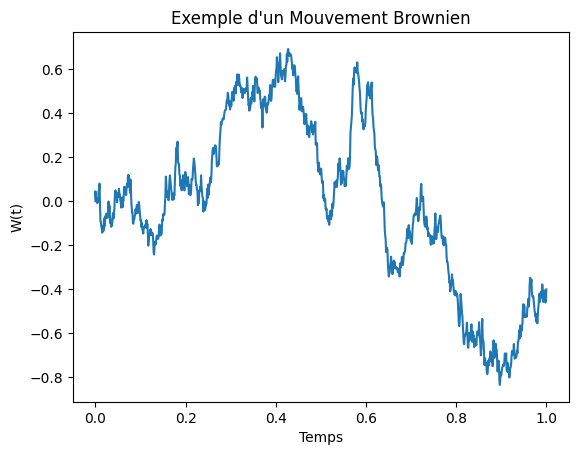

In [4]:
# Paramètres du processus brownien
T = 1.0  # durée totale
N = 1000  # nombre de pas
dt = T / N  # taille du pas de temps
t = np.linspace(0, T, N)  # grille de temps

# Simulation du mouvement
dW = np.sqrt(dt) * np.random.randn(N)  # incréments gaussiens
# sommation des incréments
W = np.cumsum(dW)  #

# Ajout du point initial W(0) = 0
W = np.insert(W, 0, 0)

# Visualisation
plt.plot(np.insert(t, 0, 0), W)
plt.title("Exemple d'un Mouvement Brownien")
plt.xlabel("Temps")
plt.ylabel("W(t)")
plt.show()

In [9]:
# Fonction du modèle stochastique
def stochastic_model(N_0, T, sigma, K, r, N):
    dt = T / N  # taille du pas de temps
    t = np.linspace(0, T, N)  # grille de temps
    N_vals = np.zeros(N)  # stockage des valeurs de N 
    N_vals[0] = N_0  # condition initiale
    
    # Simulation du processus stochastique (Euler-Maruyama)
    for i in range(1, N):
        dW = np.sqrt(dt) * np.random.randn()  # incrément brownien
        N_vals[i] = N_vals[i-1] + r * N_vals[i-1] * (1 - N_vals[i-1] / K) * dt + sigma * N_vals[i-1] * dW

    return t, N_vals

# Fonction pour afficher le graphique
def stochastic_model_plot(N_0, T, sigma, K, r, N):
    # Simulation
    t, N_vals = stochastic_model(N_0, T, sigma, K, r, N)

    # Création du graphique
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(t, N_vals, label='Population')
    ax.set_xlabel('Temps')
    ax.set_ylabel('Taille de la population')
    ax.set_title(f'Modèle stochastique de population sur {T} ans')
    ax.legend()
    ax.grid(True)
    
    plt.show()

    # Fonction de sauvegarde
    def save_graph(b):
        fig.savefig('modele_stochastique_population.png')
        print("Graphique enregistré sous 'modele_stochastique_population.png'")
    
    # Création d'un bouton avec ipywidgets pour sauvegarder
    save_button = Button(description="Save Graph")
    save_button.on_click(save_graph)
    
    # Affichage du bouton dans la cellule
    display(save_button)

# Curseurs interactifs pour les paramètres et affichage
interactive_plot = interactive(stochastic_model_plot,
                               N_0=widgets.IntSlider(min=10, max=100, step=5, value=50, description='Population initiale'),
                               T=widgets.FloatSlider(min=10, max=100, step=10, value=50, description='Durée (années)'),
                               sigma=widgets.FloatSlider(min=0.1, max=1.0, step=0.1, value=0.5, description='Volatilité'),
                               K=widgets.FloatSlider(min=50, max=500, step=50, value=100, description='Capacité de charge'),
                               r=widgets.FloatSlider(min=0.01, max=0.5, step=0.01, value=0.1, description='Taux de croissance'),
                               N=widgets.IntSlider(min=100, max=5000, step=100, value=1000, description='Pas de temps'))

# Affichage du plot interactif avec les widgets
display(VBox([interactive_plot]))